In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

In [101]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv"
df1 = pd.read_csv(url)

In [102]:
df1

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


In [103]:
df1.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [104]:
df1

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41
5,11355,Abigail,2004,F,AK,37
6,11356,Olivia,2004,F,AK,33
7,11357,Isabella,2004,F,AK,30
8,11358,Alyssa,2004,F,AK,29
9,11359,Sophia,2004,F,AK,28


In [105]:
df1.head(5)

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


In [106]:
df1.sort_values(by='Count', inplace=True)

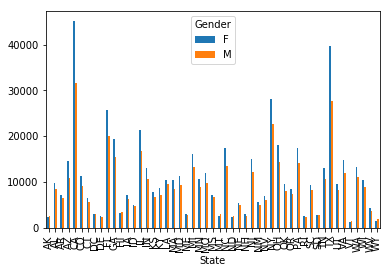

In [107]:
df1.groupby(['State', 'Gender']).size().unstack().plot(kind='bar')
plt.show()

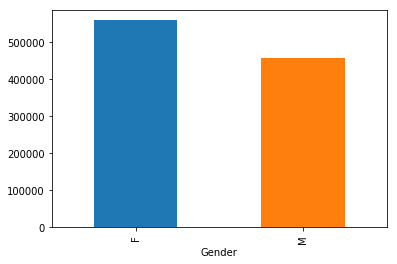

In [108]:
df1.groupby(['Gender']).size().plot(kind='bar')

In [111]:
df1.sort_values('Name')




,Id,Name,Year,Gender,State,Count
693699,3865867,Aaban,2013,M,NY,6
695768,3867936,Aaban,2014,M,NY,6
120728,691906,Aadan,2008,M,CA,7
123846,695024,Aadan,2009,M,CA,6
138678,709856,Aadan,2014,M,CA,5
897674,5061279,Aadan,2008,M,TX,5
323950,1728031,Aadarsh,2009,M,IL,5
444276,2417222,Aaden,2012,M,MD,5
60162,353908,Aaden,2012,M,AZ,5
982197,5435064,Aaden,2011,M,WA,5


In [132]:
df1_rows=[]
for i in range(len(df1.loc[:,'Name'])):
    df1_rows.append(i)

print("Median name in the data frame: ", df1.loc[np.median(df1_rows),'Name'])

Median name in the data frame:  Kasey


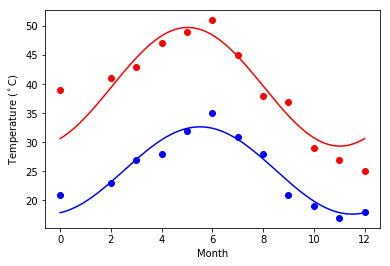

In [89]:
Max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months=np.array([0,2,3,4,5,6,7,8,9,10,11,12])


def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

optVal_max, cov_max = optimize.curve_fit(yearly_temps, months, Max_temp)
optVal_min, cov_min = optimize.curve_fit(yearly_temps, months, Min_temp)

days = np.linspace(0, 12, 365)

plt.figure()
plt.plot(months, Max_temp, 'ro')
plt.plot(days, yearly_temps(days, *optVal_max), 'r-')
plt.plot(months, Min_temp, 'bo')
plt.plot(days, yearly_temps(days, *optVal_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()